<a href="https://colab.research.google.com/github/Khalil2356/New/blob/main/Speech%20Emotion%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#install kaggle
!pip install -q kaggle
!mkdir -p ~/.kaggle/
!kaggle datasets download -d ejlok1/toronto-emotional-speech-set-tess
!unzip -qq toronto-emotional-speech-set-tess.zip
!rm -rf toronto-emotional-speech-set-tess.zip

Dataset URL: https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
 99% 422M/428M [00:03<00:00, 181MB/s]
100% 428M/428M [00:03<00:00, 138MB/s]


In [2]:
paths=[]
labels=[]

In [3]:
#import modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa  #used for audio and video
import librosa.display
from IPython.display import Audio  #used to display audio
import warnings
warnings.filterwarnings('ignore')
from keras import utils

In [4]:
for dirname, _, filenames in os.walk('/content/tess toronto emotional speech set data'):
  for filename in filenames:
    paths.append(os.path.join(dirname,filename))
    label=filename.split('_')[-1]
    label=label.split('.')[0]
    labels.append(label.lower())
  if(len(paths)==2800):
    break
print('dataset is download')

dataset is download


In [5]:
paths[:5]

['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_mop_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_jail_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_goose_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_page_happy.wav',
 '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_king_happy.wav']

In [6]:
labels[:5]

['happy', 'happy', 'happy', 'happy', 'happy']

In [7]:
df=pd.DataFrame()
df['speech']=paths
df['label']=labels
df.head()

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy


In [8]:
df['label'].value_counts()

,count
label,
happy,400
neutral,400
sad,400
fear,400
ps,400
angry,400
disgust,400


In [9]:
df['label_count']=df['label'].value_counts()

In [10]:
df.drop('label_count',axis=1)

,speech,label
0,/content/tess toronto emotional speech set dat...,happy
1,/content/tess toronto emotional speech set dat...,happy
2,/content/tess toronto emotional speech set dat...,happy
3,/content/tess toronto emotional speech set dat...,happy
4,/content/tess toronto emotional speech set dat...,happy
...,...,...
2795,/content/tess toronto emotional speech set dat...,sad
2796,/content/tess toronto emotional speech set dat...,sad
2797,/content/tess toronto emotional speech set dat...,sad
2798,/content/tess toronto emotional speech set dat...,sad


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   speech       2800 non-null   object 
 1   label        2800 non-null   object 
 2   label_count  0 non-null      float64
dtypes: float64(1), object(2)
memory usage: 65.8+ KB


<Axes: xlabel='label', ylabel='count'>

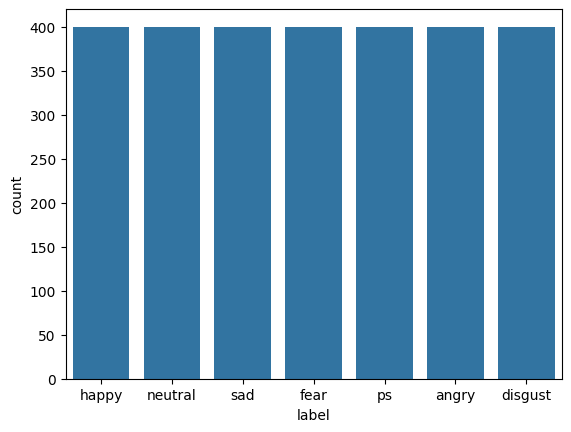

In [12]:
sns.countplot(data=df,x='label')

In [13]:
def waveplot(data,sr,emotion):
  plt.figure(figsize=(10,4))
  plt.title(emotion,size=20)
  librosa.display.waveshow(data,sr=sr)
  plt.show()

def spectogram(data,sr,emotion):
  x=librosa.stft(data)
  xdb=librosa.amplitude_to_db(abs(x))
  plt.figure(figsize=(11,4))
  plt.title(emotion,size=20)
  librosa.display.specshow(xdb,sr=sr,x_axis='time',y_axis='hz')
  plt.colorbar()

In [14]:
df.drop('label_count',axis=1,inplace=True)

In [15]:
print(df.head())
print(df['label'].unique())

                                              speech  label
0  /content/tess toronto emotional speech set dat...  happy
1  /content/tess toronto emotional speech set dat...  happy
2  /content/tess toronto emotional speech set dat...  happy
3  /content/tess toronto emotional speech set dat...  happy
4  /content/tess toronto emotional speech set dat...  happy
['happy' 'neutral' 'sad' 'fear' 'ps' 'angry' 'disgust']


In [16]:
df['speech'].unique()

array(['/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_mop_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_jail_happy.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/OAF_happy/OAF_goose_happy.wav',
       ...,
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_void_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_deep_sad.wav',
       '/content/tess toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_sad/YAF_pass_sad.wav'],
      dtype=object)

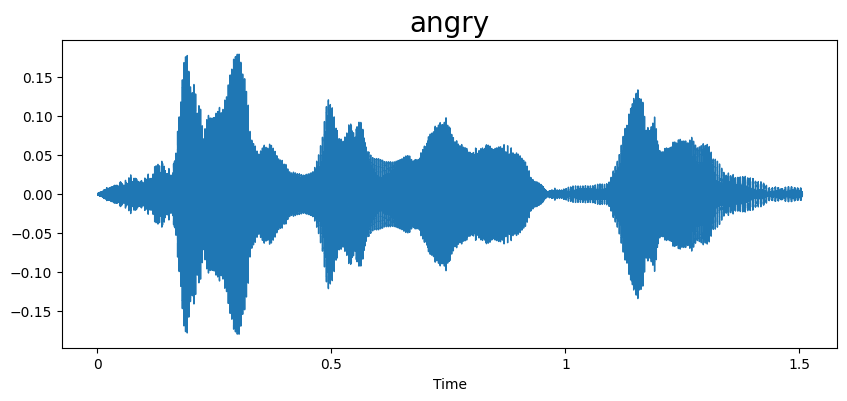

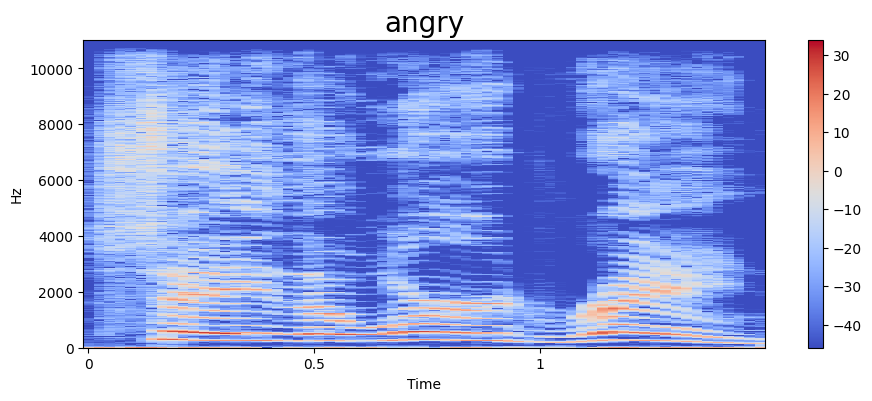

In [17]:
emotion='angry'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

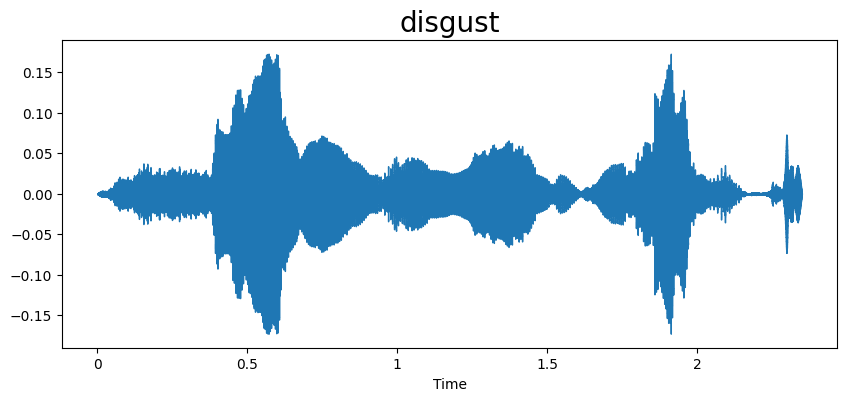

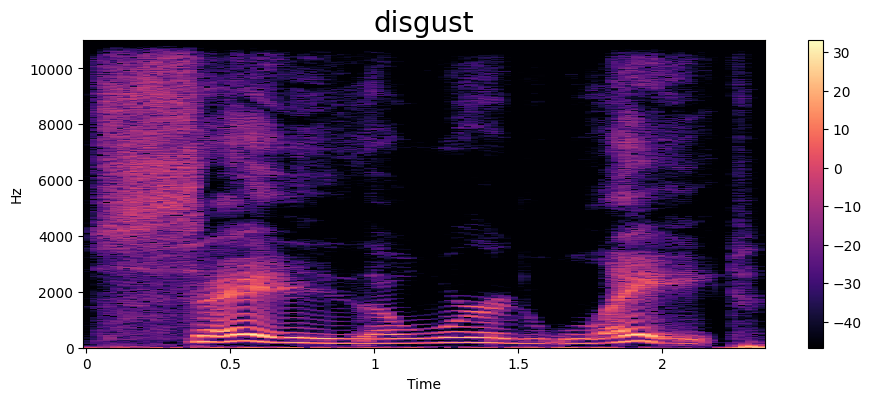

In [18]:
emotion='disgust'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

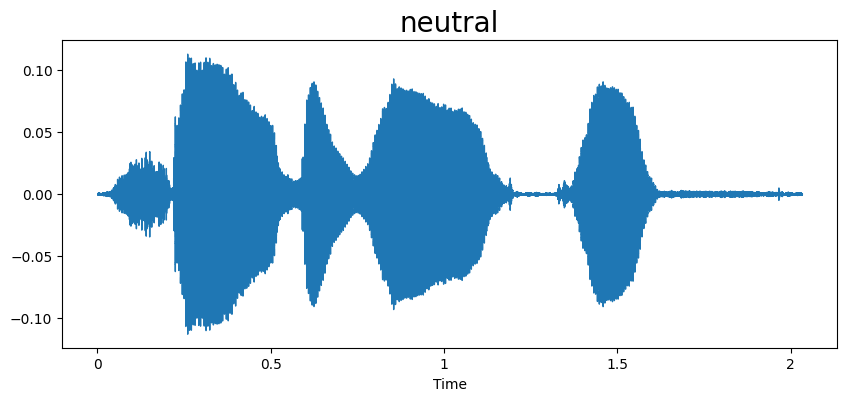

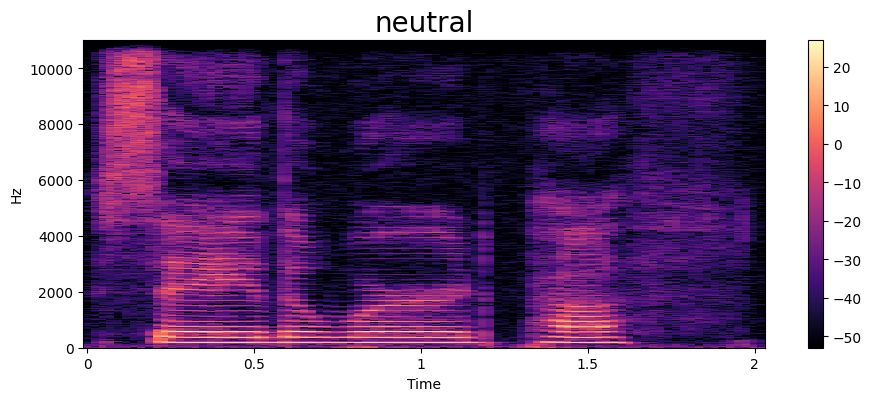

In [19]:
emotion='neutral'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

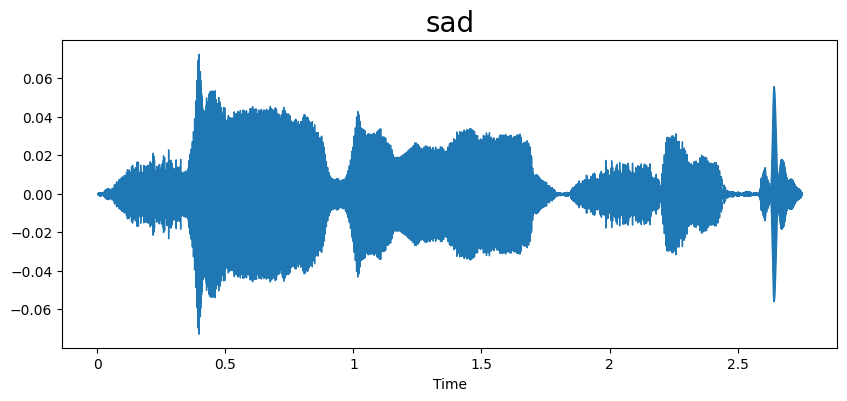

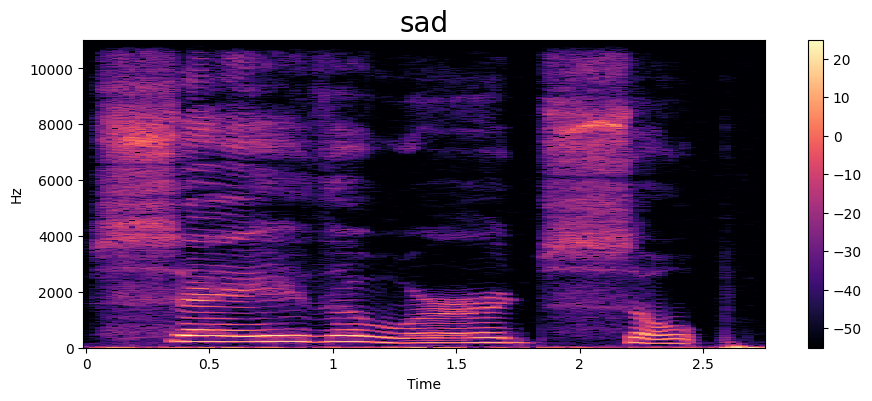

In [20]:
emotion='sad'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

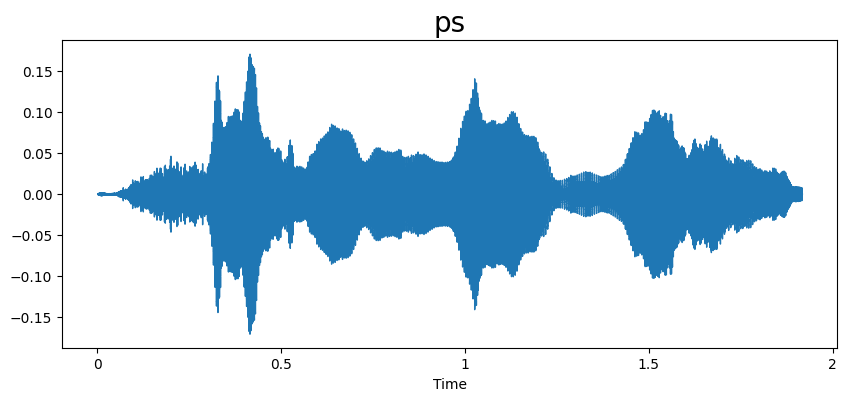

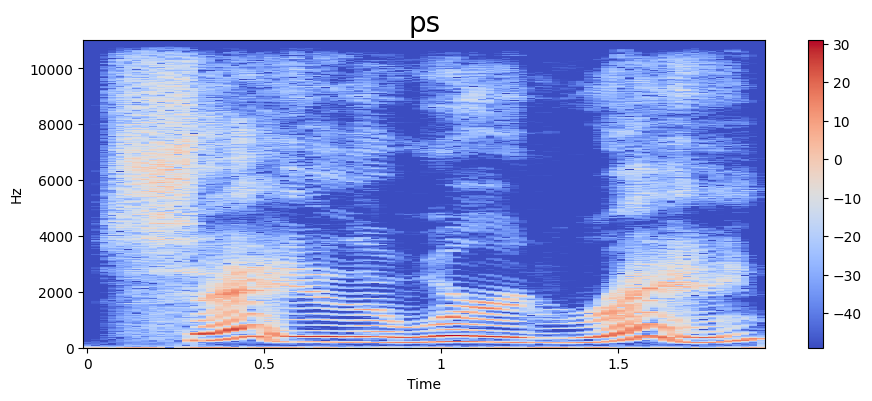

In [21]:
emotion='ps'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

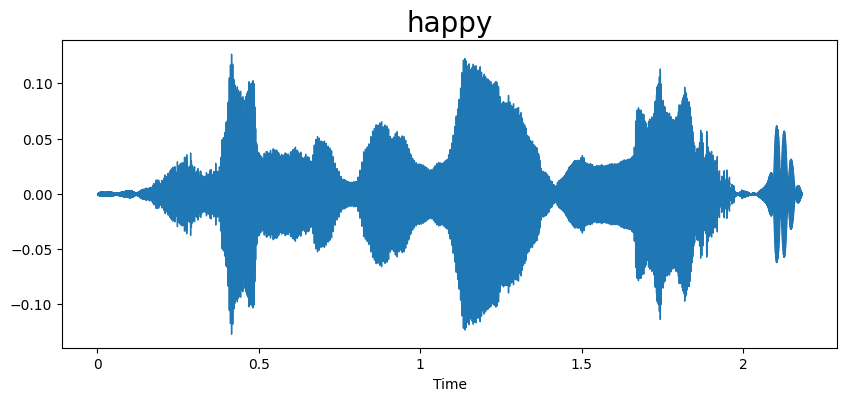

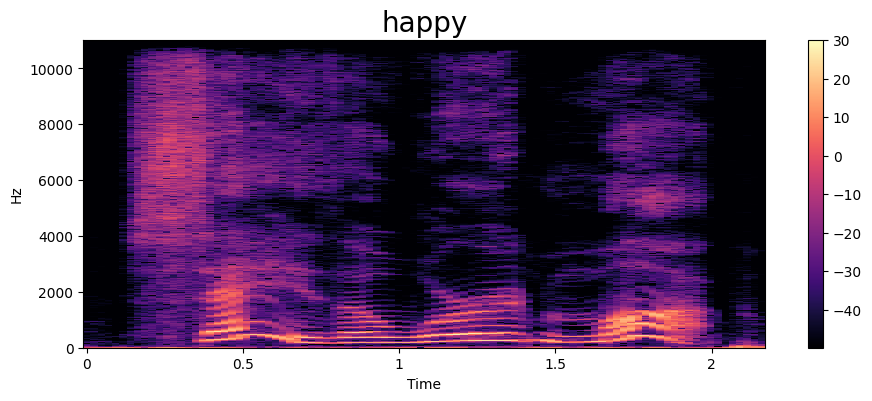

In [22]:
emotion='happy'
path=np.array(df['speech'][df['label']==emotion])[0]
data,sampling_rate=librosa.load(path)
waveplot(data,sampling_rate,emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [23]:
#feature extraction
def extract_mfcc(filename):
  y,sr=librosa.load(filename,duration=3,offset=0.5)
  mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
  return mfcc

In [24]:
x_mfcc=df['speech'].apply(lambda x:extract_mfcc(x))

In [25]:
x_mfcc

,speech
0,"[-460.7585, 113.900536, 23.663628, -13.877024,..."
1,"[-449.13742, 96.45725, 17.998125, -8.307005, -..."
2,"[-484.74765, 86.24343, 23.298674, -4.9515595, ..."
3,"[-453.62155, 72.9814, 17.660355, 10.043306, 11..."
4,"[-470.51227, 100.68906, 18.407953, 1.7734963, ..."
...,...
2795,"[-386.84512, 79.1401, 23.153788, 41.69883, -0...."
2796,"[-374.33188, 73.79313, 28.351664, 58.40284, 0...."
2797,"[-418.53574, 88.28475, 27.516254, 37.002735, -..."
2798,"[-444.86426, 95.62697, 32.697212, 41.41305, 5...."


In [26]:
x=[x for x in x_mfcc]
x=np.array(x)
x.shape

(2800, 40)

In [27]:
#input split
x=np.expand_dims(x,-1)
x.shape

(2800, 40, 1)

In [28]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])
y

<2800x7 sparse matrix of type '<class 'numpy.float64'>'
	with 2800 stored elements in Compressed Sparse Row format>

In [29]:
y=y.toarray()

In [30]:
y.shape

(2800, 7)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
model=Sequential([
    LSTM(256,return_sequences=False,input_shape=(40,1)),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(64,activation='relu'),
    Dropout(0.5),
    Dense(7,activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()
Model: "sequential"

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
#Train the model
history=model.fit(x_train,y_train,validation_data=(x_val,y_val),epochs=30,batch_size=64)

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 157ms/step - accuracy: 0.2195 - loss: 1.9059 - val_accuracy: 0.6036 - val_loss: 1.1564
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 191ms/step - accuracy: 0.4849 - loss: 1.2996 - val_accuracy: 0.7750 - val_loss: 0.7243
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - accuracy: 0.6552 - loss: 0.8749 - val_accuracy: 0.8571 - val_loss: 0.4271
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.8053 - loss: 0.5579 - val_accuracy: 0.9446 - val_loss: 0.1917
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 161ms/step - accuracy: 0.8740 - loss: 0.4004 - val_accuracy: 0.9286 - val_loss: 0.1895
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - accuracy: 0.9183 - loss: 0.2837 - val_accuracy: 0.9589 - val_loss: 0.1191
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - accuracy: 0.9263 - loss: 0.2557 - val_accuracy: 0.9196 - val_loss: 0.2881
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.9179 - loss: 0.2913 - val_accuracy: 

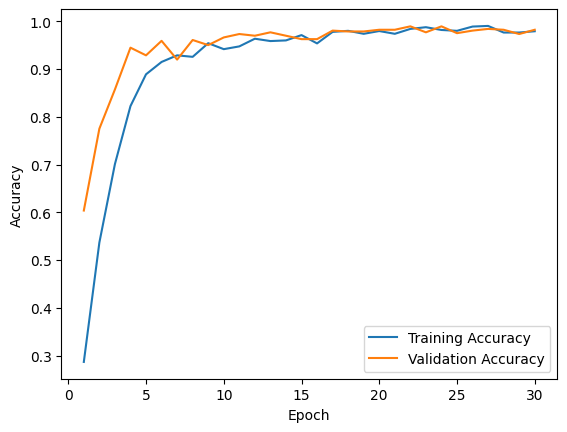

In [34]:
#visualize the result
epoch=list(range(1,31))
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epoch,acc,label='Training Accuracy')
plt.plot(epoch,val_acc,label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

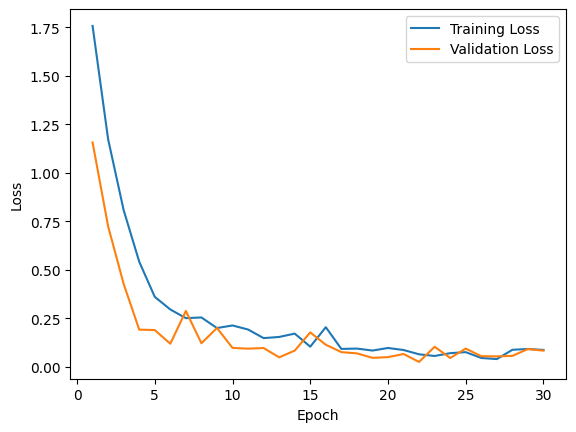

In [35]:
loss=history.history['loss']
val_loss=history.history['val_loss']
plt.plot(epoch,loss,label='Training Loss')
plt.plot(epoch,val_loss,label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [36]:
y_pred=model.predict(x_val)
y_pred_classes=np.argmax(y_pred,axis=1)
y_val_classes=np.argmax(y_val,axis=1)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step


In [37]:
from sklearn.metrics import confusion_matrix,classification_report

In [38]:
conf_matrix=confusion_matrix(y_val_classes,y_pred_classes)
print('confusion matrix')
print(conf_matrix)

confusion matrix
[[71  1  1  0  0  0  1]
 [ 0 80  0  0  0  1  1]
 [ 0  0 86  0  0  0  0]
 [ 0  0  0 76  0  1  0]
 [ 0  0  0  0 85  0  1]
 [ 2  0  0  1  0 67  0]
 [ 0  0  0  0  0  0 85]]


In [39]:
target_names=['angry','disgust','fear','happy','neutral','ps','sad']
print("Classification Report")
print(classification_report(y_val_classes,y_pred_classes,target_names=target_names))

Classification Report
              precision    recall  f1-score   support

       angry       0.97      0.96      0.97        74
     disgust       0.99      0.98      0.98        82
        fear       0.99      1.00      0.99        86
       happy       0.99      0.99      0.99        77
     neutral       1.00      0.99      0.99        86
          ps       0.97      0.96      0.96        70
         sad       0.97      1.00      0.98        85

    accuracy                           0.98       560
   macro avg       0.98      0.98      0.98       560
weighted avg       0.98      0.98      0.98       560



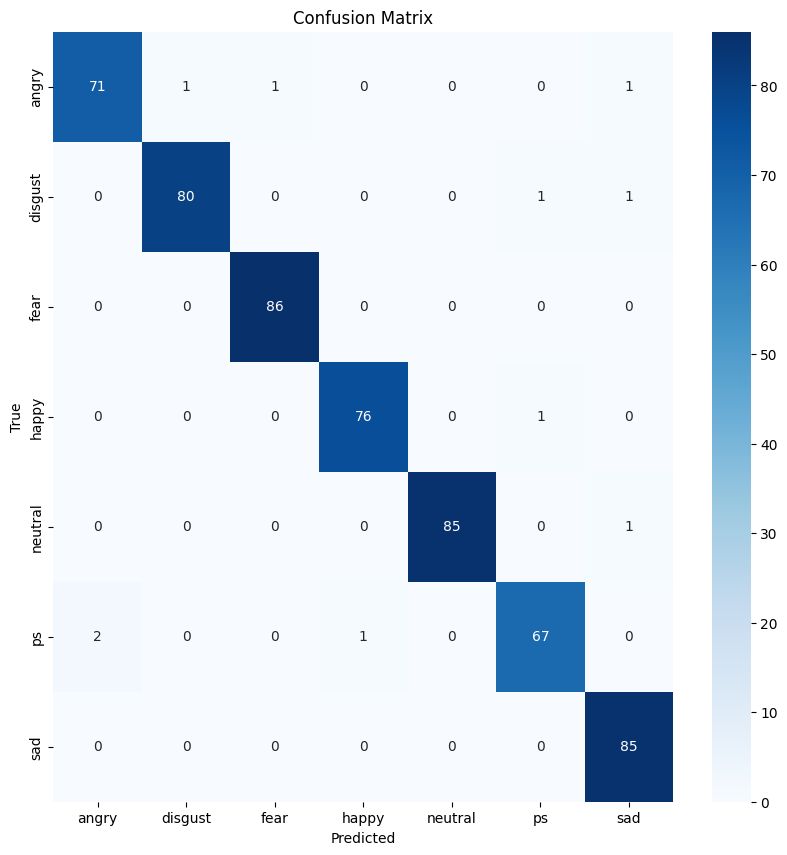

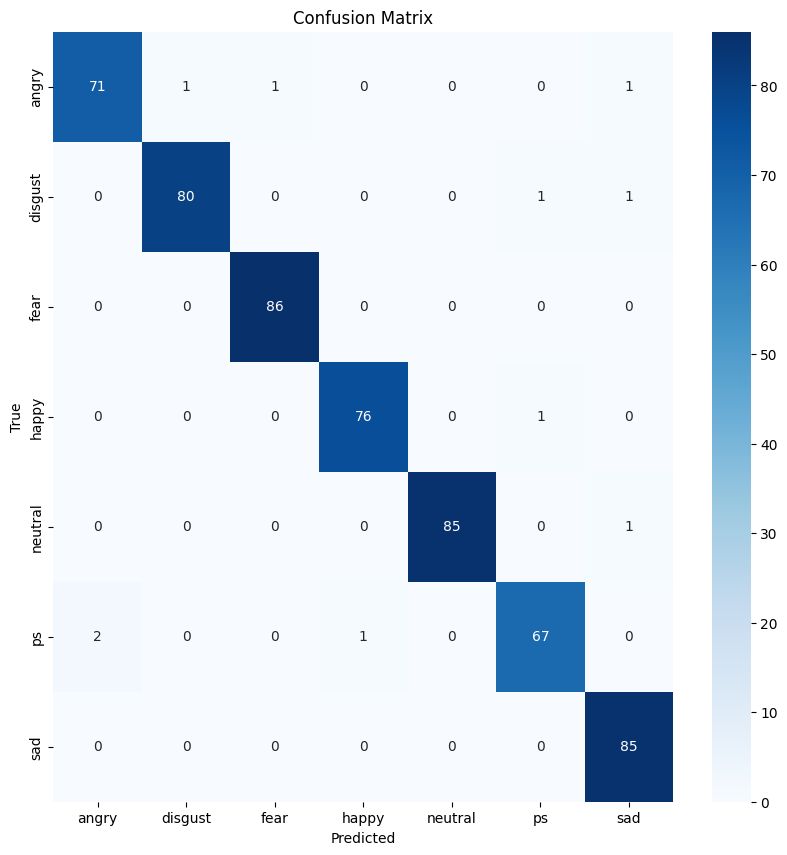

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',xticklabels=target_names,yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()